# Test RunPod Endpoint

In [58]:
import requests
import base64
import cv2
import io
import numpy as np
from PIL import Image
import json

In [59]:
def Image2B64(image: np.ndarray):
    return base64.b64encode(cv2.imencode(".png", image)[1]).decode("utf-8")

In [60]:
def stringToRGB(base64_string: str):
    imgdata = base64.b64decode(str(base64_string))
    img = Image.open(io.BytesIO(imgdata))
    
    return img

In [61]:
API_KEY = "S4HSM4FYZP9CCHTP2BDQ4XNWXV4Z6TKTOOSVG25Z"

In [104]:
def run_image_enhance(
    api_key: str,
    image_path: str,
    upscale: int = 1,
    bg_enhance: bool = False,
    face_upsample: bool = False,
):
    headers = {"Authorization": f"Bearer {api_key}"}

    image = cv2.imread(image_path)
    data = {
        "input": {
            "image": Image2B64(image=image),
            "upscale": upscale,
            "bg_enhance": bg_enhance,
            "face_upsample": face_upsample,
        }
    }
    response = requests.post(
        "https://api.runpod.ai/v2/d3fdqulaa0fcgl/run",
        headers=headers,
        data=json.dumps(data),
    )

    return response.json()["id"]

In [105]:
run_response = run_image_enhance(
    api_key=API_KEY,
    image_path="inputs/user_upload/IMG_4449.jpeg",
    upscale=2,
    bg_enhance=True,
)

In [106]:
run_response

'61193e02-b325-451d-a631-0139f882b6eb-u1'

In [107]:
def get_image_enhancement_response(api_key: str, id: str):
    import time

    headers = {"Authorization": f"Bearer {api_key}"}

    while True:
        response: dict = requests.post(
            f"https://api.runpod.ai/v2/d3fdqulaa0fcgl/status/{id}",
            headers=headers,
        ).json()

        if (
            response.get("status") == "IN_PROGRESS"
            or response.get("status") == "IN_QUEUE"
        ):
            print("IN-QUEUE wait 5 more seconds...")
            time.sleep(5)

        elif response.get("status") == "COMPLETED":
            break
        else:
            break

    return response

In [108]:
response = get_image_enhancement_response(
    api_key=API_KEY, id=run_response
)

IN-QUEUE wait 5 more seconds...


IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...
IN-QUEUE wait 5 more seconds...


In [109]:
response

{'delayTime': 138219,
 'executionTime': 16495,
 'id': '61193e02-b325-451d-a631-0139f882b6eb-u1',
 'output': {'enhanced_image': 'iVBORw0KGgoAAAANSUhEUgAABCQAAAQACAIAAAC2yR9+AAAgAElEQVR4AcTBUXJjt4Ig0UywXu9/Y/70hDdD5ACXgiTSqrLafh0+x99+/4N/Q8XPVXxXQLFEQGwVR8VRAcUSscSWQMVRARVQcZRAxVEBFVABsUUssUQssUQsBQRBERTRwhJLxVJA/FMqh8ozTZBXKofKM5V/puJVQLFUfKXiWVwqaIEKqDgqoAIqnsUWAhVfqTgqviGogNgUQQRUDpVnsomACqiAyqFyaIALuIAKqIAKKIuyyCYCKqACKqACKocbKqAgDyqHyqECKu+UQz6o/JzxX1FxGIv8RCwRUHFUfIh3xVHxKraACIhLscRSscUWLwqQreKoOCqOCohYYqn4EFtABVRABVS8i0W2iqPiqDhaaIHZMefsK3POas5Zc7nf51+63+9zzvv9Pue83+/zxb25Nees5pzVPKo5Z8ecs68AFc8qvqICKuAxxvAYY/iVMYZjc9z8ZIyhjjE8AA/AY4zhi+EHfDHG8HvGGL4bQx1uYwwPxIXhwlAZLrgBKl7ACwio4MKbFrYAlUNlk02g4igg/ixBCHDwIiBeiTH4gsqhsgkoiwqogBsquAAuoOIGqOAFN1QWBVFEBVRABVQWBWRTEZFDBVSeqYDKM5UXcZFnFV9JXlQcFS9iiXhWcSRLbCVLLBXPIiC24iJQcVQsBQRBBURABVREEbRRTbrQMdvmnBXQxqw5mTVnL+ZFrYAKqICKr6iAomiCC6iAx/AzPIa4gDqG7wDfpCiCCngAKuABeOGiAiqgAiogmwqIgMqhcqiAv/3+B/+Gip+r+K6AYomA2CqOiqMCiiViiS2BiqMCKqDiKIGKowIq

In [110]:
image = stringToRGB(response["output"]["enhanced_image"])

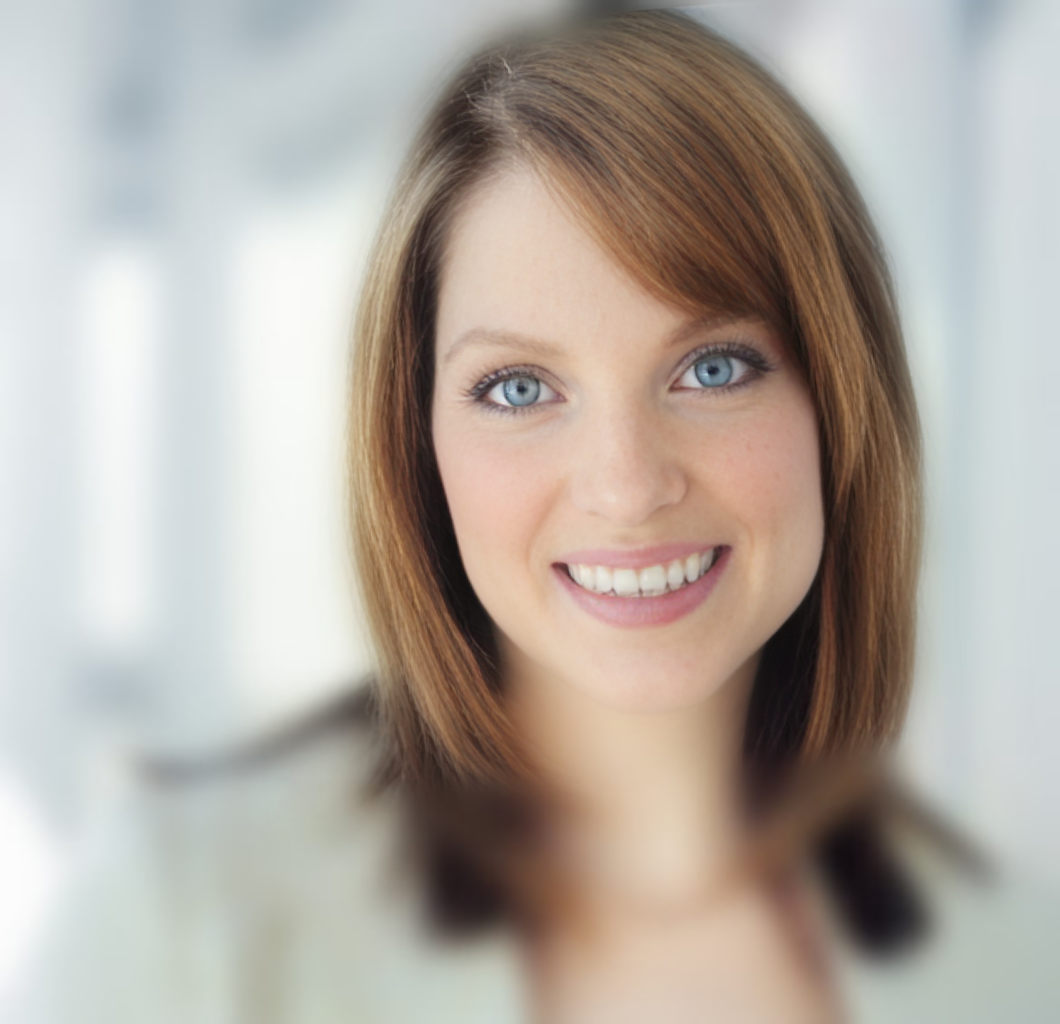

In [111]:
image